[[-0.28315208 -3.77878804 -2.79670032 -2.0522026  -0.01135876  1.11008937
   4.61954675  1.82592169 -4.27349851  4.28372191 -2.92582822  0.55226104
  -3.24493005  0.39832527 -1.5364192   0.43511603  0.91357227 -0.86588074
  -5.42114262  1.58265053  2.39580353  0.78933341 -0.75158159 -0.6684528
  -0.9267404   1.1719944  -1.4283769   0.43538447  1.3760795   4.04917493
   1.1572051   1.02692258  0.77809727 -2.06372334 -2.77774455  1.61415221
  -2.40664554  3.7050371   1.44531635  2.55633061  0.27799088 -0.07301707
   0.8763912   2.58451996  0.80250973 -0.93500654  3.68458677 -4.05133395
  -0.13610099 -3.03941005]
 [-0.63136352  5.56177409  2.13923135  3.69703689  1.28279872  1.6754717
  -6.6794353  -1.85067917  3.95455894 -4.43135317  2.89229966 -0.38186398
   2.62840034  0.46989844  1.25187134 -0.39102789  0.16180167 -0.51911264
   6.76215803 -0.7393372  -1.87851645  0.54404582 -0.57385396 -0.18687687
   1.51288236 -3.24916353  2.83246681  0.79232931 -2.38856347 -1.61169026
  -2.44658001

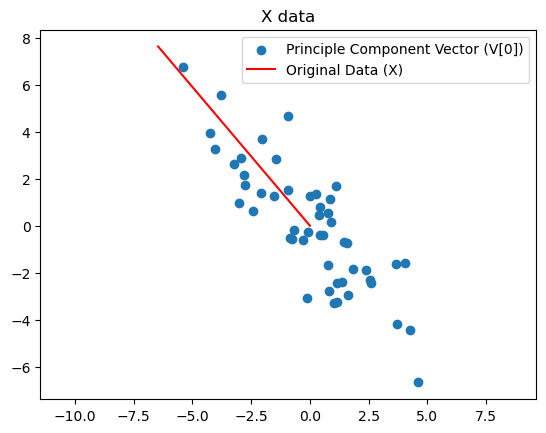

V
  [ 0.99633819 11.47205837]
[[-0.29874213  6.68628306  3.43996721  4.1474337   0.9861714   0.56095111
  -8.08252901 -2.59232833  5.77966532 -6.15008736  4.09805182 -0.6483315
   4.10293648  0.10109542  1.94829311 -0.57960744 -0.4670246   0.16355586
   8.66376029 -1.58708944 -2.98191166 -0.09505454  0.04790883  0.28945854
   1.75339055 -3.23676609  3.08452132  0.32317066 -2.71200195 -3.84696621
  -2.61480187 -3.16260004 -1.79145291  2.38757927  3.10782307 -3.28822989
   2.01966719 -5.58296553 -1.46991369 -3.43459551  0.8602661  -0.16374986
   0.29847528 -3.51882023 -2.65174082  4.1800328  -3.62306028  5.11899131
  -2.26371266  2.69463382]]


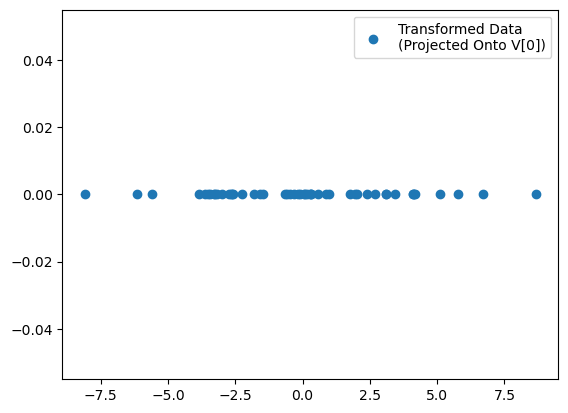

[[ 0.19309154 -4.3216694  -2.22341784 -2.68068778 -0.63741046 -0.36256994
   5.22413095  1.67554767 -3.73567833  3.97510008 -2.64876987  0.41904813
  -2.65192707 -0.06534288 -1.25927644  0.37462843  0.30186067 -0.10571409
  -5.59980895  1.02581297  1.92735429  0.06143836 -0.0309658  -0.18709111
  -1.13330145  2.09207909 -1.9936759  -0.20888089  1.75289854  2.48648105
   1.69007341  2.04414197  1.157903   -1.54320842 -2.00873696  2.12534264
  -1.30540897  3.60854171  0.95007659  2.21994585 -0.55603175  0.10583949
  -0.19291907  2.27438438  1.71394885 -2.70175817  2.34175978 -3.30865264
   1.46314741 -1.74167268]
 [-0.22795288  5.10191677  2.62484048  3.16466733  0.75249049  0.42802942
  -6.16731149 -1.97805616  4.41012909 -4.69277678  3.12698687 -0.49470435
   3.13071407  0.07714008  1.48663005 -0.44226499 -0.35635952  0.12480004
   6.61081554 -1.21101637 -2.27532471 -0.07253063  0.03655646  0.22086911
   1.33791115 -2.46978943  2.35362023  0.24659288 -2.06937219 -2.93539792
  -1.995204

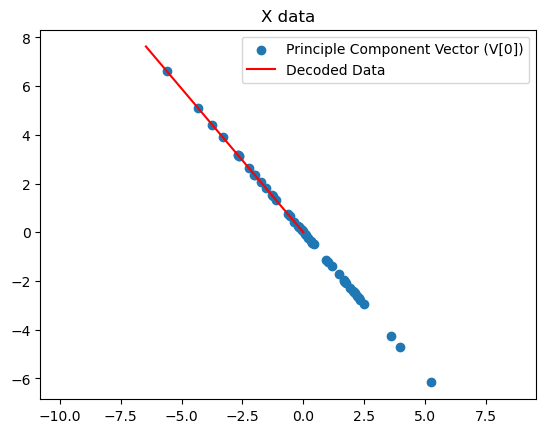

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import automatic differentiator to compute gradient module
from autograd import grad 

# # gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
# def gradient_descent(g,alpha,max_its,w):
#     # compute gradient module using autograd
#     gradient = grad(g)

#     # run the gradient descent loop
#     weight_history = [w]           # container for weight history
#     cost_history = [g(w)]          # container for corresponding cost function history
#     for k in range(max_its):
#         # evaluate the gradient, store current weights and cost function value
#         grad_eval = gradient(w)

#         # take gradient descent step
#         w = w - alpha*grad_eval
        
#         # record weight and cost
#         weight_history.append(w)
#         cost_history.append(g(w))
#     return weight_history,cost_history

# def center(X):
#     '''
#     A function for normalizing each feaure dimension of an input array, mean-centering
#     and division by its standard deviation
    
#     '''
#     X_means = np.mean(X,axis=1)[:,np.newaxis]
#     X_normalized = X - X_means
#     return X_normalized

def compute_pcs(X,lam):
    '''
    A function for computing the principal components of an input data matrix.  Both
    principal components and variance parameters (eigenvectors and eigenvalues of XX^T)
    are returned
    '''
    # create the correlation matrix
    P = float(X.shape[1])
    Cov = 1/P*np.dot(X,X.T) + lam*np.eye(X.shape[0])

    # use numpy function to compute eigenvalues / vectors of correlation matrix
    D,V = np.linalg.eigh(Cov)
    return V, D

def pca_transform_data(X,**kwargs):
    '''
    A function for producing the full PCA transformation on an input dataset X.  
    '''
    # user-determined number of principal components to keep, and regularizer penalty param
    num_components = X.shape[0]
    if 'num_components' in kwargs:
        num_components = kwargs['num_components']
    lam = 10**(-7)
    if 'lam' in kwargs:
        lam = kwargs['lam']
    
    # compute principal components
    V,D = compute_pcs(X,lam)
    V = V[:,-num_components:]
    D = D[-num_components:]

    # compute transformed data for PC space: V^T X
    W = np.dot(V.T,X)
    return W,V,D

def decode(V,W):
    decoded = np.dot(V,W)
    return decoded

X = np.loadtxt('2d_span_data_centered.csv',delimiter=',')
#X = np.linspace(0,1,10)
#X = np.vstack([X,np.sin(X+np.random.randint(-10,16))]).T

print(X)
d,v = compute_pcs(X,0)
W,V,D = pca_transform_data(X,num_components=1)
print("D\n ",d)
plt.scatter(X[0,:],X[1,:])
plt.plot([0, 10*V[0,0]],[0, 10*V[1,0]],'r')
plt.legend(['Principle Component Vector (V[0])','Original Data (X)'])
plt.axis('equal');
plt.title("X data")
plt.show()
print("V\n ",v)

print(W)
plt.scatter(W[0,:],np.zeros_like(W))
plt.legend(['Transformed Data \n(Projected Onto V[0])'])
#plt.plot(W[0,:],W[1,:],'r')
plt.show()
dec = decode(V,W)
print(dec)
plt.scatter(dec[0,:],dec[1,:])
plt.plot([0, 10*V[0,0]],[0, 10*V[1,0]],'r')
plt.legend(['Principle Component Vector (V[0])','Decoded Data'])
plt.axis('equal');
plt.title("X data")
plt.show()